In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

In [2]:
heart_df = pd.read_csv("heart_disease_data.csv")
heart_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
dropped = heart_df.dropna()
dropped

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [4]:
dropped.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
dropped.head(15)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


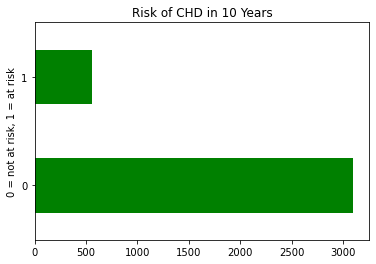

In [6]:
CHD_grouped = dropped.groupby("TenYearCHD").count()
risk_plot=CHD_grouped.plot.barh(y="age", title = "Risk of CHD in 10 Years", color = "green", legend=None)
risk_plot.set_ylabel("0 = not at risk, 1 = at risk")
plt.savefig("plots/Risk")

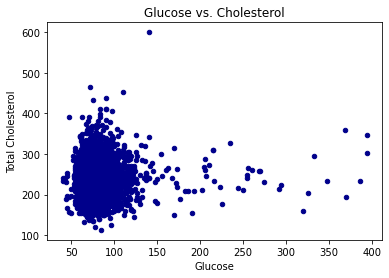

In [7]:
chol_glucose = dropped.plot.scatter(x='glucose',
                      y='totChol',
                      c='DarkBlue',
                                   title = "Glucose vs. Cholesterol")
chol_glucose.set_xlabel("Glucose")
chol_glucose.set_ylabel("Total Cholesterol")
plt.savefig("plots/Glucose_Cholesterol")

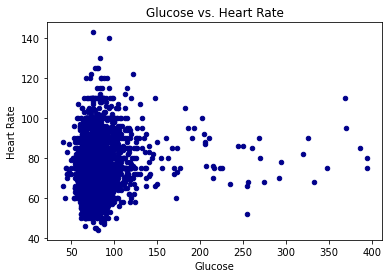

In [8]:
heart_glucose =dropped.plot.scatter(x='glucose',
                      y='heartRate',
                      c='DarkBlue',
                               title='Glucose vs. Heart Rate')
heart_glucose.set_xlabel("Glucose")
heart_glucose.set_ylabel("Heart Rate")
plt.savefig("plots/Heartrate_Glucose")

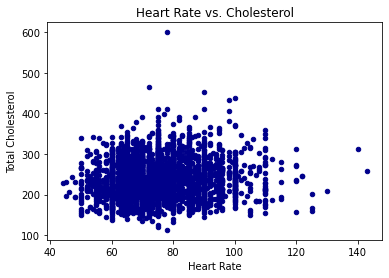

In [9]:
heart_chol = dropped.plot.scatter(x='heartRate',
                      y='totChol',
                      c='DarkBlue',
                                 title='Heart Rate vs. Cholesterol')
heart_chol.set_xlabel("Heart Rate")
heart_chol.set_ylabel("Total Cholesterol")
plt.savefig("plots/Heartrate_Cholesterol")

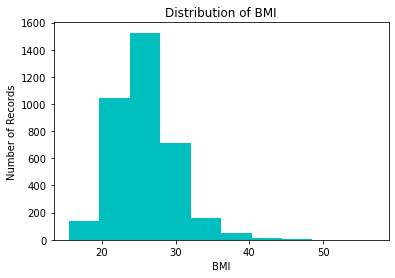

In [10]:
bmi_hist = plt.hist(dropped["BMI"], color = "c")
plt.xlabel("BMI")
plt.ylabel("Number of Records")
plt.title("Distribution of BMI")
plt.savefig("plots/BMI_hist")

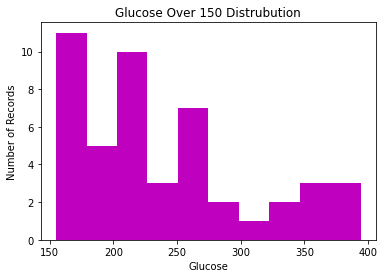

In [11]:
gluc_hist_over150 = dropped["glucose"].loc[dropped["glucose"]>150]
plt.hist(gluc_hist_over150, color = "m")
plt.xlabel("Glucose")
plt.ylabel("Number of Records")
plt.title("Glucose Over 150 Distrubution")
plt.savefig("plots/gluc_hist_over150")

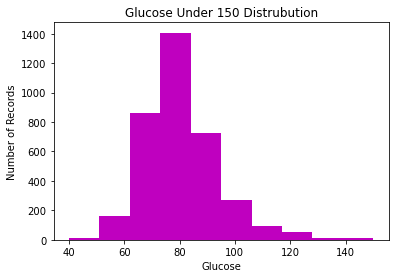

In [12]:
gluc_hist_under150 = dropped["glucose"].loc[dropped["glucose"]<=150]
plt.hist(gluc_hist_under150, color = "m")
plt.xlabel("Glucose")
plt.ylabel("Number of Records")
plt.title("Glucose Under 150 Distrubution")
plt.savefig("plots/gluc_hist_under150")

In [27]:
colormap = cm.get_cmap('tab20c', 4)
print(colormap)

In [28]:
risk = dropped["TenYearCHD"]
colormap(risk)

array([[0.19215686, 0.50980392, 0.74117647, 1.        ],
       [0.19215686, 0.50980392, 0.74117647, 1.        ],
       [0.19215686, 0.50980392, 0.74117647, 1.        ],
       ...,
       [0.99215686, 0.68235294, 0.41960784, 1.        ],
       [0.19215686, 0.50980392, 0.74117647, 1.        ],
       [0.19215686, 0.50980392, 0.74117647, 1.        ]])

In [29]:
colors=pd.DataFrame(colormap(risk))
colors

,0,1,2,3
0,0.192157,0.509804,0.741176,1.0
1,0.192157,0.509804,0.741176,1.0
2,0.192157,0.509804,0.741176,1.0
3,0.992157,0.682353,0.419608,1.0
4,0.192157,0.509804,0.741176,1.0
...,...,...,...,...
3651,0.192157,0.509804,0.741176,1.0
3652,0.992157,0.682353,0.419608,1.0
3653,0.992157,0.682353,0.419608,1.0
3654,0.192157,0.509804,0.741176,1.0


In [30]:
colors[0].value_counts()

0.192157    3099
0.992157     557
Name: 0, dtype: int64

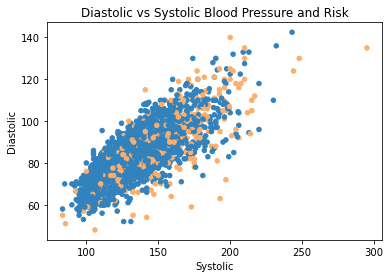

In [31]:
bp_risk = dropped.plot.scatter(x='sysBP',
                      y='diaBP',
                      c=colormap(risk),
                                 title='Diastolic vs Systolic Blood Pressure and Risk')
bp_risk.set_xlabel("Systolic")
bp_risk.set_ylabel("Diastolic")
plt.savefig("plots/bp_risk")

In [18]:
max_sys = dropped["sysBP"].max()
dropped["TenYearCHD"].loc[dropped["sysBP"] == max_sys]

481    1
Name: TenYearCHD, dtype: int64

In [19]:
bins = [30, 40, 50, 60, 70]
labels = ["30-40", "41-50", "51-60", "61-70"]
dropped["age_bins"] = pd.cut(dropped["age"], bins, labels=labels)
grouped_age = dropped.groupby("age_bins")

<ipython-input-19-1ce33812f463>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped["age_bins"] = pd.cut(dropped["age"], bins, labels=labels)


In [20]:
bin_counts = grouped_age.count()
bin_counts

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age_bins,,,,,,,,,,,,,,,,
30-40,646,646,646,646,646,646,646,646,646,646,646,646,646,646,646,646
41-50,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394
51-60,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118
61-70,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498


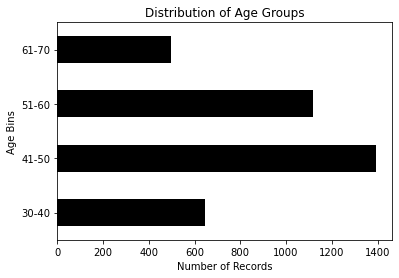

In [21]:
age_plot=bin_counts.plot.barh(y="age", title = "Distribution of Age Groups", legend=None, color ="black")
age_plot.set_xlabel("Number of Records")
age_plot.set_ylabel("Age Bins")
plt.savefig("plots/Age_Bins")

In [22]:
smoker_counts = dropped["currentSmoker"].value_counts()
smoker_counts

0    1868
1    1788
Name: currentSmoker, dtype: int64

In [23]:
non_smokers = smoker_counts[0]
smokers= smoker_counts[1]
datapoints = len(dropped)
percent_non_smokers = "{:.2f}%".format(non_smokers/datapoints * 100)
percent_smokers = "{:.2f}%".format(smokers/datapoints * 100)
print(f"There are {non_smokers} non-smokers in the data, or {percent_non_smokers} of the dataset.")
print(f"There are {smokers} smokers in the data, or {percent_smokers} of the dataset.")

There are 1868 non-smokers in the data, or 51.09% of the dataset.
There are 1788 smokers in the data, or 48.91% of the dataset.


In [24]:
grouped_cig_count = dropped.groupby("cigsPerDay").count()
grouped_cig_count

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bins
cigsPerDay,,,,,,,,,,,,,,,,
0.0,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868,1868
1.0,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
2.0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
3.0,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
4.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5.0,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
6.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
7.0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
8.0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [25]:
smoker_cig_counts = grouped_cig_count.loc[1:]
smoker_cig_counts

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_bins
cigsPerDay,,,,,,,,,,,,,,,,
1.0,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
2.0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
3.0,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
4.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5.0,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
6.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
7.0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
8.0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9.0,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99


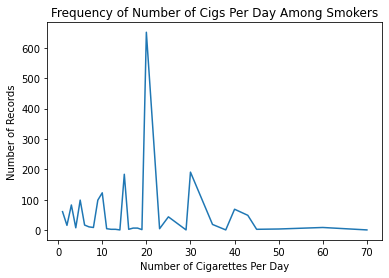

In [26]:
daily_cigs_plot = smoker_cig_counts["age"].plot.line(title="Frequency of Number of Cigs Per Day Among Smokers")
daily_cigs_plot.set_xlabel("Number of Cigarettes Per Day")
daily_cigs_plot.set_ylabel("Number of Records")
plt.savefig("plots/Cig_Frequency")